In [1]:
import pandas as pd
dataset = pd.read_csv('datasets_9961_14084_Train.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Regression
dataset.shape

(8523, 12)

In [4]:
type(dataset.shape)

tuple

In [5]:
print('Rows: ',dataset.shape[0])
print('Columns: ',dataset.shape[1])

Rows:  8523
Columns:  12


In [6]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
type(dataset.dtypes)

pandas.core.series.Series

In [8]:
for i in dataset.columns:
    print((dataset[i].value_counts()/len(dataset))*100)
    

FDW13    0.117330
FDG33    0.117330
FDU12    0.105597
FDF52    0.105597
FDX04    0.105597
DRE49    0.105597
FDX20    0.105597
FDV60    0.105597
NCY18    0.105597
NCB18    0.105597
FDQ40    0.105597
FDP25    0.105597
NCJ30    0.105597
NCQ06    0.105597
FDO19    0.105597
FDW49    0.105597
NCI54    0.105597
FDX31    0.105597
FDD38    0.105597
FDW26    0.105597
FDF56    0.105597
DRN47    0.105597
NCF42    0.105597
FDV38    0.105597
FDT07    0.105597
FDG09    0.105597
NCL31    0.105597
FDY03    0.093864
FDS52    0.093864
FDV09    0.093864
           ...   
NCW30    0.023466
NCG19    0.023466
NCX53    0.023466
NCV18    0.023466
FDZ50    0.023466
NCW05    0.023466
FDT33    0.023466
NCM42    0.023466
FDE39    0.023466
FDB10    0.023466
FDD48    0.023466
FDA48    0.023466
DRL59    0.023466
FDR03    0.023466
DRG25    0.023466
FDI36    0.023466
FDE38    0.023466
FDR57    0.023466
FDU43    0.023466
FDG28    0.023466
FDH22    0.023466
FDN52    0.011733
FDT35    0.011733
FDK57    0.011733
DRF48    0

In [9]:
dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
l1 = []
for i in dataset.dtypes:
    l1.append(i)
l1

[dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64')]

In [11]:
l2 = []
for i in  dataset.columns:
    print(i)
    l2.append(i)
dict1 = {}
for i in range(len(l2)):
    dict1[l2[i]] = l1[i]
dict1

Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Outlet_Sales


{'Item_Identifier': dtype('O'),
 'Item_Weight': dtype('float64'),
 'Item_Fat_Content': dtype('O'),
 'Item_Visibility': dtype('float64'),
 'Item_Type': dtype('O'),
 'Item_MRP': dtype('float64'),
 'Outlet_Identifier': dtype('O'),
 'Outlet_Establishment_Year': dtype('int64'),
 'Outlet_Size': dtype('O'),
 'Outlet_Location_Type': dtype('O'),
 'Outlet_Type': dtype('O'),
 'Item_Outlet_Sales': dtype('float64')}

In [12]:
l3= []
for i in sorted(dict1.items()):
    l3.append(i)
l3

[('Item_Fat_Content', dtype('O')),
 ('Item_Identifier', dtype('O')),
 ('Item_MRP', dtype('float64')),
 ('Item_Outlet_Sales', dtype('float64')),
 ('Item_Type', dtype('O')),
 ('Item_Visibility', dtype('float64')),
 ('Item_Weight', dtype('float64')),
 ('Outlet_Establishment_Year', dtype('int64')),
 ('Outlet_Identifier', dtype('O')),
 ('Outlet_Location_Type', dtype('O')),
 ('Outlet_Size', dtype('O')),
 ('Outlet_Type', dtype('O'))]

In [13]:
l3 = list(dataset.select_dtypes(['float64']).columns)
l4 =  list(dataset.select_dtypes(['object']).columns)
dict1 = {}
#dict3 = {i:'object' if i in l4 else i:'float64' if i in l3 for i in dataset.columns }
for i in dataset.columns:
    if i in l4:
        
        dict1[i] ='object'
    elif i in l3:
        dict1[i] = 'float64'
dict2 = sorted(dict1.items(), key  = lambda x: x[1])
dict2
#dict3

[('Item_Weight', 'float64'),
 ('Item_Visibility', 'float64'),
 ('Item_MRP', 'float64'),
 ('Item_Outlet_Sales', 'float64'),
 ('Item_Identifier', 'object'),
 ('Item_Fat_Content', 'object'),
 ('Item_Type', 'object'),
 ('Outlet_Identifier', 'object'),
 ('Outlet_Size', 'object'),
 ('Outlet_Location_Type', 'object'),
 ('Outlet_Type', 'object')]

In [14]:
dataset['Item_Weight'].isnull().sum()

1463

In [15]:
dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:

dataset['Item_Visibility'].mean()

0.06613202877895127

In [17]:
dataset.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [18]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
dataset['Item_Weight'].isnull().sum()

1463

In [20]:
dataset['Item_Weight'].interpolate(inplace = True)

In [21]:
for i in dataset.columns:
    print(i,dataset[i].isnull().sum())

Item_Identifier 0
Item_Weight 0
Item_Fat_Content 0
Item_Visibility 0
Item_Type 0
Item_MRP 0
Outlet_Identifier 0
Outlet_Establishment_Year 0
Outlet_Size 2410
Outlet_Location_Type 0
Outlet_Type 0
Item_Outlet_Sales 0


In [22]:
dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0],inplace = True)

In [23]:
dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].map({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular','Low Fat':'Low Fat','Regular':'Regular'})

In [25]:
dataset['Item_Identifier'] = dataset['Item_Identifier'].str[0:2]
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [27]:
#item visibility ka 0 ko replace
import numpy as np
dataset['Item_Visibility'] = np.where(dataset['Item_Visibility'] == 0.0,np.nan,dataset['Item_Visibility'])
dataset['Item_Visibility'] = dataset.groupby('Item_Type')['Item_Visibility'].transform(lambda x:x.fillna(x.mean()))

In [28]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.073719,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.064963,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
dataset['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

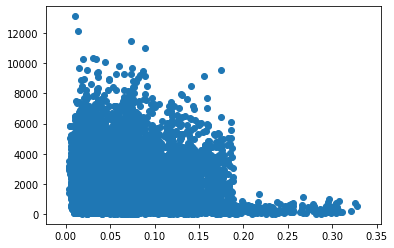

In [30]:
plt.scatter(x=dataset['Item_Visibility'], y=dataset['Item_Outlet_Sales']);

plt.show(block=True);

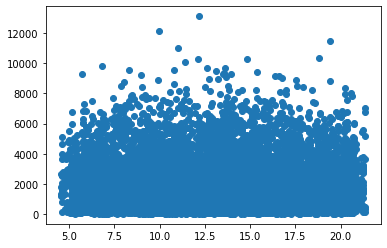

In [31]:
plt.scatter(x=dataset['Item_Weight'], y=dataset['Item_Outlet_Sales']);

plt.show(block=True);

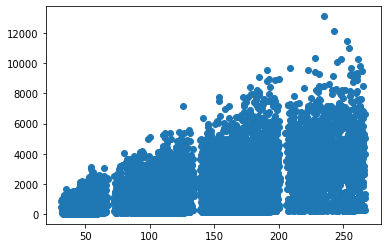

In [32]:
plt.scatter(x=dataset['Item_MRP'], y=dataset['Item_Outlet_Sales']);

plt.show(block=True);

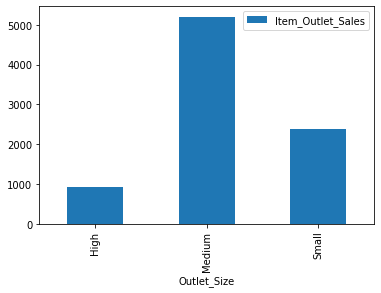

In [33]:
(dataset[['Outlet_Size','Item_Outlet_Sales']].groupby('Outlet_Size').count()).plot.bar()

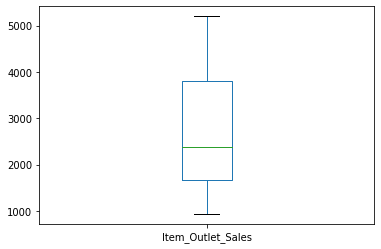

In [34]:
(dataset[['Outlet_Size','Item_Outlet_Sales']].groupby('Outlet_Size').count()).plot.box()

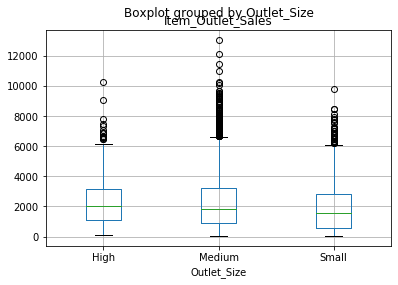

In [35]:
dataset.boxplot(column='Item_Outlet_Sales', by='Outlet_Size')

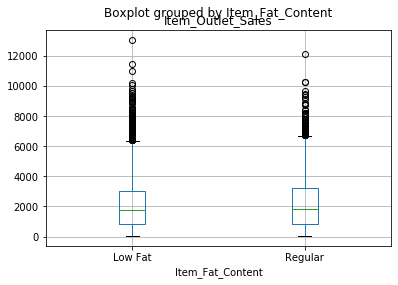

In [36]:
dataset.boxplot(column='Item_Outlet_Sales', by='Item_Fat_Content')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016646D35390>,
      dtype=object)

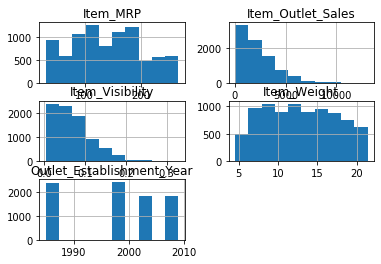

In [37]:
dataset.hist()

In [38]:
X = pd.DataFrame(dataset['Item_MRP'])
y = pd.DataFrame(dataset['Item_Outlet_Sales'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.31464959407175586, 0.3232985767695027, 0.32501734486001066]


In [39]:

dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.073719,182.0950,1998,732.3800,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.064963,53.8614,1987,994.7052,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [40]:
x,y =dataset.drop(['Item_Outlet_Sales'],axis =1),dataset.Item_Outlet_Sales


In [41]:
x.shape,y.shape

((8523, 38), (8523,))

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)


In [43]:
lr = LinearRegression()

In [44]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lr_pred = lr.predict(x_test)

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,lr_pred)

0.5495564542829747